#### Test final implementation of expo.py module

In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

%matplotlib inline
from prep import prep
from expo import expo

In [2]:
df = pd.read_csv('test_file_by_2.csv')

In [3]:
df.head()

,date,county,category,total_amount_sold,total_sales_dollars
0,2016-09-01,LINN,american vodkas,32541,276725.76
1,2016-10-01,LINN,american vodkas,35255,282506.41
2,2016-11-01,LINN,american vodkas,39521,327080.42
3,2016-12-01,LINN,american vodkas,38355,311999.82
4,2017-01-01,LINN,american vodkas,32319,268929.67


In [4]:
f_list = ['county','category']

In [5]:
#df_prep = prep(df,'date','total_amount_sold',f_list).df_ready
df_prep = prep(df,'date','total_amount_sold',f_list,fill_missing=False).df_ready


this is inside method, after serilazie function  Index(['county', 'category', 'date', 'srl_num', 'index', 'total_amount_sold'], dtype='object')


In [6]:
df_prep.head()

,county,category,date,srl_num,total_amount_sold
0,LINN,american vodkas,2016-09-01,0,32541.0
1,LINN,american vodkas,2016-10-01,0,35255.0
2,LINN,american vodkas,2016-11-01,0,39521.0
3,LINN,american vodkas,2016-12-01,0,38355.0
4,LINN,american vodkas,2017-01-01,0,32319.0


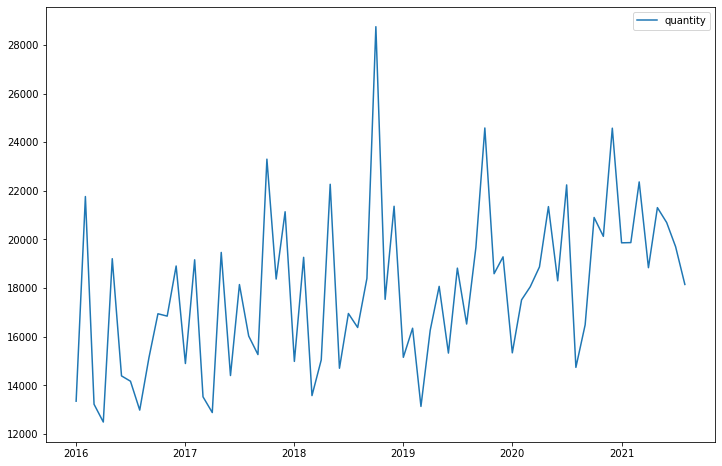

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df_prep[df_prep.srl_num == '1'].date,df_prep[df_prep.srl_num == '1'].total_amount_sold,label='quantity')
# ax.plot(new_fc_df.date,new_fc_df.forecast,color='red',label='forecast')
ax.legend()

In [8]:
df_prep.dtypes

county                       object
category                     object
date                 datetime64[ns]
srl_num                      object
total_amount_sold           float64
dtype: object

In [9]:
ex1 = expo(df = df_prep,horizon = 12, date_variable='date',target_variable='total_amount_sold',field_list=f_list,ts_id='srl_num',seasonal_periods=12)

Forecasting the following county                 LINN
category    american vodkas
srl_num                   0
Name: 0, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forecasting the following county                   LINN
category    canadian whiskies
srl_num                     1
Name: 60, dtype: object ...


/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forecasting the following county                 POLK
category    american vodkas
srl_num                   2
Name: 128, dtype: object ...


/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)
/workspaces/exponential_smoothing/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forecasting the following county                   POLK
category    canadian whiskies
srl_num                     3
Name: 188, dtype: object ...
final fc df         date      forecast srl_num county         category
0 2021-09-30  47572.017822       0   LINN  american vodkas
1 2021-10-31  54087.561731       0   LINN  american vodkas
2 2021-11-30  50669.621989       0   LINN  american vodkas
3 2021-12-31  51375.527970       0   LINN  american vodkas
4 2022-01-31  48422.668970       0   LINN  american vodkas


/workspaces/exponential_smoothing/expo.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = forecast.append(fcast,ignore_index=True)


In [10]:
fcast1 = ex1.forecast

In [11]:
fcast1.head()

,date,forecast,srl_num,county,category
0,2021-09-30,47572.017822,0,LINN,american vodkas
1,2021-10-31,54087.561731,0,LINN,american vodkas
2,2021-11-30,50669.621989,0,LINN,american vodkas
3,2021-12-31,51375.527970,0,LINN,american vodkas
4,2022-01-31,48422.668970,0,LINN,american vodkas


In [ ]:
df

In [15]:
## Need to deploy and use function to plot by series
srl = '1'
fc_temp = fcast1[fcast1.srl_num == srl]
df_temp = df_prep[df_prep.srl_num == srl]

In [16]:
df_temp.head()

,county,category,date,srl_num,total_amount_sold
60,LINN,canadian whiskies,2016-01-01,1,13349.0
61,LINN,canadian whiskies,2016-02-01,1,21764.0
62,LINN,canadian whiskies,2016-03-01,1,13223.0
63,LINN,canadian whiskies,2016-04-01,1,12492.0
64,LINN,canadian whiskies,2016-05-01,1,19208.0


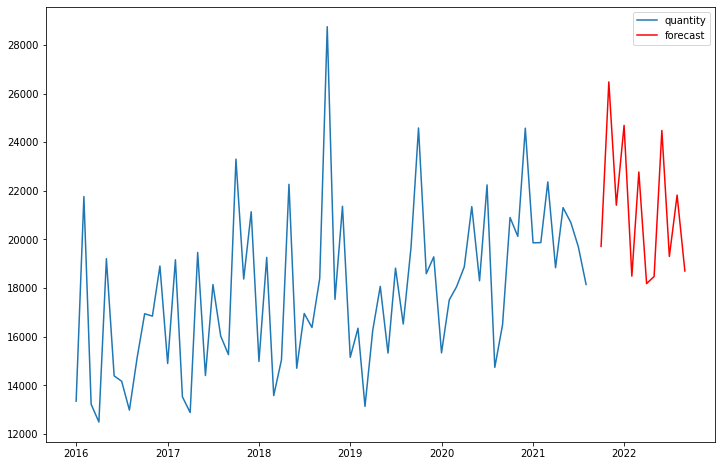

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df_temp.date,df_temp.total_amount_sold,label='quantity')
ax.plot(fc_temp.date,fc_temp.forecast,color='red',label='forecast')
ax.legend()

### test with bigger dataset - Iowa liquors


In [1]:
df_liq = pd.read_csv('iowa_liqours.vsv')

NameError: name 'pd' is not defined